**Install libraries**

In [ ]:
#!pip3 install pandas
#!pip3 install scikit-learn

**Import libraries**

In [ ]:
from google.colab import drive
from google.colab import files
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

**Import Data**

In [ ]:
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/FYP/midland/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hk_island = [
  "Chai_wan", "Heng_fa_chuen", "Shau_kei_wan", "Sai_wan_ho_tai_koo", "Quarry_bay", "North_point_fortress_hill", 
  "Braemar_hill_north_point_mid_level", "Jardines_lookout_tai_hang", "Happy_valley_mid_level_east", "Wan_chai_causeway_bay", 
  "Tin_hau", "Central_mid_level_admiralty", "Sheung_wan_central", "Hong_kong_west", "Western_mid_levels", "The_peak", 
  "Residence_bel_air_pokfulam", "Ap_lei_chau", "Aberdeen_wong_chuk_hang", "Repulse_bay_shou_son_hill", "Tai_tam_shek_o", "Stanley"
]

kowloon = [
  "Tsim_sha_tsui", "Kowloon_station", "Yau_ma_tei", "Kingspark", "Mongkok", "Tai_kok_tsui", "Olympic", "Lai_chi_kok", "Mei_foo", 
  "Cheung_sha_wan_sham_shui_po", "Yau_yat_tsuen", "Kowloon_tong_beacon_hill", "Ho_man_tin", "Hung_hum", "To_kwa_wan", "Kai_tak", 
  "Kowloon_city", "Wong_tai_sin_lok_fu", "Diamond_hill_san_po_kong_ngau_chi_wan", "Kowloon_bay", "Kwun_tong", "Lam_tin_yau_tong", 
  "Lohas_park", "Tiu_keng_leng", "Hang_hau", "Po_lam_tseung_kwan_o_station"
]

new_territory = [
  "Sai_kung_clear_water_bay", "Shatin", "Kau_to_shan_fotan", "Ma_on_shan", "Tai_po", "North", "Sheung_shui_fanling", "Hung_shui_kiu", 
  "Fairview_palm_springs_the_vineyard", "Tin_shui_wai", "Yuen_long", "Tuen_mun", "Tsuen_wan", "Sham_tseng", "Ma_wan", "Kwai_chung", 
  "Tsing_yi", "Discovery_bay", "Tung_chung", "Lan_tau_island"
]


In [ ]:
# Data directory
dir_hk_island = "./hk_island/"
dir_kowloon = "./kowloon/"
dir_new_territory = "./new_territory/"

def get_data_by_region(region_name, disctrict_dir):

  region_df = pd.DataFrame()
  for region in region_name:
    new_df = pd.read_csv(data_dir+disctrict_dir+region+".csv")
    region_df = pd.concat([region_df, new_df], axis=0)

  # Data cleaning
  region_df = region_df.drop(region_df.columns[0], axis=1)

  region_df['tx_date'] = pd.to_datetime(region_df['tx_date'], dayfirst=True)
  region_df['first_op_date'] = pd.to_datetime(region_df['first_op_date'], dayfirst=True)
  region_df['last_tx_date'] = pd.to_datetime(region_df['last_tx_date'], dayfirst=True)

  region_df['floor'] = region_df['floor'].replace("-", np.nan)
  region_df['flat'] = region_df['flat'].replace("-", np.nan)

  region_df['area'] = region_df['area'].replace(0, np.nan)
  region_df['net_area'] = region_df['net_area'].replace(0, np.nan)
  region_df['last_price'] = region_df['last_price'].replace(0, np.nan)
  region_df['floor'] = region_df['floor'].astype('str') 
  region_df = region_df[~region_df['floor'].str.contains("&") == True]
  region_df['floor'] = region_df['floor'].replace("G", 0).replace("LG", 0).replace("LG1", 0)
  region_df['floor'] = region_df['floor'].apply(pd.to_numeric, errors = 'coerce')

  region_df.sort_values(by=['tx_date'], inplace=True, ascending=False)

  region_df = region_df.reset_index()
  region_df = region_df.drop(['index'], axis=1)
  return region_df

def download_data(filename, download_data):
  dataFrame = pd.DataFrame(data=download_data)
  dataFrame.to_csv(filename)
  files.download(filename)

# Get data by region
data_df_hk_island = get_data_by_region(hk_island, dir_hk_island)
data_df_kowloon = get_data_by_region(kowloon, dir_kowloon)
data_df_new_territory = get_data_by_region(new_territory, dir_new_territory)

# Get all region data
data_df_all = pd.concat([data_df_hk_island, data_df_kowloon, data_df_new_territory], axis=0)
data_df_all.sort_values(by=['tx_date'], inplace=True, ascending=False)
data_df_all = data_df_all.reset_index()
data_df_all = data_df_all.drop(['index'], axis=1)

data_df_all.columns = ['region', 'subregion', 'district', 'estate', 'building', 'firstOpDate',
                      'floorL', 'bedroom', 'sittingroom', 'floor', 'flat', 'grossArea', 'saleableArea',
                      'price', 'regDate', 'lastRegDate', 'lastPrice', 'gain', 'lat', 'lon']

data_df_all.head()

# Download the disctrict data
#download_data("region_hk.csv", data_df_hk_island)
#download_data("region_kowloon.csv", data_df_kowloon)
#download_data("region_new_east.csv", data_df_new_territory)
#download_data("all_data.csv", data_df_all)

,region,subregion,district,estate,building,firstOpDate,floorL,bedroom,sittingroom,floor,flat,grossArea,saleableArea,price,regDate,lastRegDate,lastPrice,gain,lat,lon
0,Hong Kong Island,Eastern,Heng Fa Chuen (Chai Wan),Heng Fa Chuen,Block 31,1988-03-19,L,2.0,NaN,NaN,6,597.0,498.0,8250000.0,2021-01-07,2003-01-17,1700000.0,385.29,22.278636,114.239373
1,New Territories,Sha Tin,Shatin,City One Shatin,Block 31,1983-08-13,M,2.0,1.0,NaN,D,395.0,327.0,5400000.0,2021-01-07,NaT,NaN,0.00,22.386003,114.204891
2,Kowloon,Kowloon City,Hung Hom,Royal Peninsula,Block 1,2000-12-14,H,3.0,NaN,NaN,B,1251.0,952.0,21000000.0,2021-01-07,2008-01-18,9680000.0,116.94,22.304435,114.184404
3,New Territories,Kwai Tsing,Tsing Yi,Cheung Fat Estate,Block 1 (King Fat House),1989-09-01,H,NaN,NaN,NaN,21,629.0,485.0,3950000.0,2021-01-07,NaT,NaN,0.00,22.361853,114.103990
4,New Territories,Yuen Long,Yuen Long,Grand Del Sol,Block 01,1997-12-05,H,3.0,NaN,NaN,E,883.0,740.0,7830000.0,2021-01-07,1997-08-06,4953900.0,58.06,22.440296,114.034537


**House price graph**

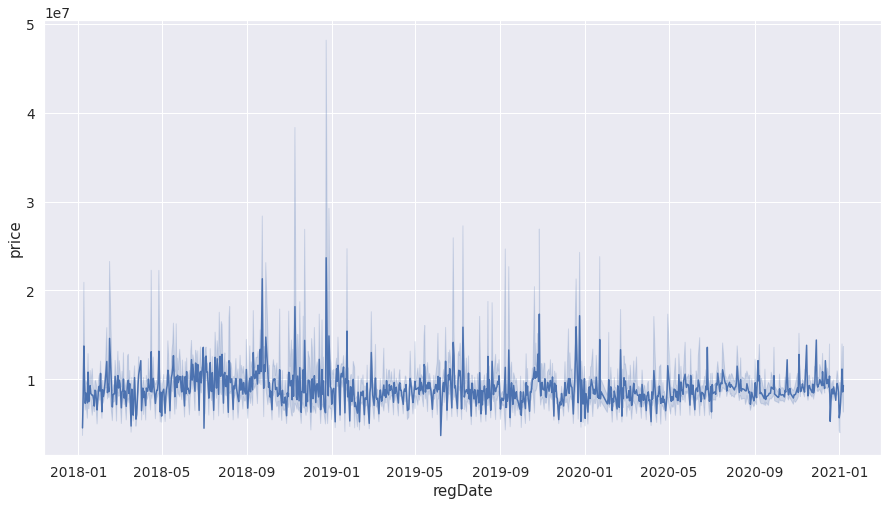

In [ ]:
data_plot = pd.DataFrame({"regDate":data_df_all['regDate'], "price":data_df_all['price']})
plt.subplots(figsize=(15, 8))
sns.lineplot(x = "regDate", y = "price", data=data_plot)
plt.show()

**Percentage of missing values**

In [ ]:
percentage_missing = data_df_all.isnull().sum() / len(data_df_all) * 100 
missing_value_df = pd.DataFrame({'feature': data_df_all.columns, '% missing': percentage_missing})
print(missing_value_df)

                   feature  % missing
region              region   0.000000
subregion        subregion   0.000000
district          district   0.000000
estate              estate   0.000000
building          building   0.003005
firstOpDate    firstOpDate  10.867802
floorL              floorL   6.290525
bedroom            bedroom  34.293217
sittingroom    sittingroom  81.149457
floor                floor   1.936193
flat                  flat   4.537615
grossArea        grossArea  49.740699
saleableArea  saleableArea   0.301666
price                price   0.000000
regDate            regDate   0.000000
lastRegDate    lastRegDate  44.390628
lastPrice        lastPrice  44.391229
gain                  gain   0.000000
lat                    lat   4.969683
lon                    lon   4.969683


**Price distribution**

count    1.664090e+05
mean     9.133268e+06
std      1.310856e+07
min      5.500000e+05
25%      5.200000e+06
50%      6.830000e+06
75%      9.500000e+06
max      1.399000e+09
Name: price, dtype: float64


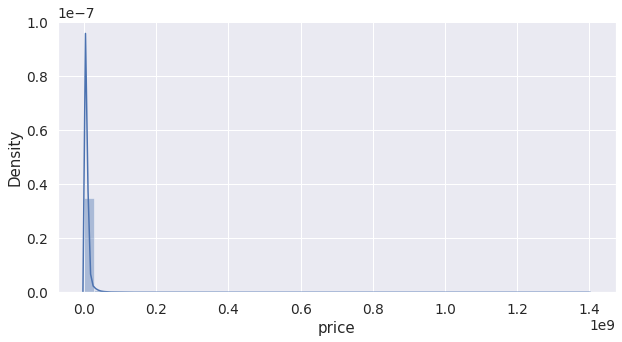

In [ ]:
# Price distribution
print(data_df_all['price'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(data_df_all['price']);

In [ ]:
# Skewness and kurtosis
print("Skewness: ", data_df_all['price'].skew())
print("Kurtosis: ", data_df_all['price'].kurt())

Skewness:  26.927207752922435
Kurtosis:  1526.4066673335874


**Log price distribution**

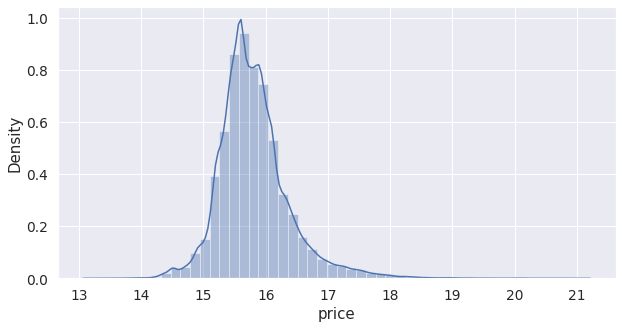

In [ ]:
log_df = data_df_all.copy()
log_df["price"] = np.log1p(log_df["price"])

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(log_df["price"]);

**Feature Engineering**

In [ ]:
def removeOutlier(outliers_removed_df, col):
  # Calculate mean and standard deviation
  data_mean, data_std = np.mean(outliers_removed_df[col]), np.std(outliers_removed_df[col])
  # Calculate upper boundary
  upper = data_mean + data_std * 3

  # Remove outliers
  outliers_removed_df = outliers_removed_df[outliers_removed_df[col] < upper]

  print("Length of data after removing outliers:", len(outliers_removed_df))

  fig, ax = plt.subplots(figsize=(10, 3))
  sns.boxplot(x=col, data=outliers_removed_df)

  return outliers_removed_df

In [252]:
processed_df = data_df_all.copy()

# Make new features
processed_df['buildingAge'] = pd.to_datetime("today").year - pd.DatetimeIndex(processed_df['firstOpDate']).year
processed_df['month'] = pd.to_datetime(processed_df['regDate']).dt.month
processed_df['year'] = pd.to_datetime(processed_df['regDate']).dt.year
processed_df['monthYear'] = pd.to_datetime(processed_df['regDate']).dt.to_period('M')

# Drop unneccessary columns and columns with too many missing values
processed_df = processed_df.drop(['firstOpDate', 'lastRegDate', 'sittingroom'], axis=1) 

# Fill missing values with 0
processed_df['floorL'] = processed_df['floorL'].fillna('Unknown')
processed_df['lat'] = processed_df['lat'].fillna(0)
processed_df['lon'] = processed_df['lon'].fillna(0)

# Fill missing values wiith mean values
bedroom_mean = processed_df['bedroom'].mean()
processed_df['bedroom'] = processed_df['bedroom'].fillna(bedroom_mean)
processed_df['bedroom'] = processed_df['bedroom'].astype(int)

saleableArea_mean = processed_df['grossArea'].mean()
processed_df['grossArea'] = processed_df['grossArea'].fillna(saleableArea_mean)

saleableArea_mean = processed_df['saleableArea'].mean()
processed_df['saleableArea'] = processed_df['saleableArea'].fillna(saleableArea_mean)

saleableArea_mean = processed_df['lastPrice'].mean()
processed_df['lastPrice'] = processed_df['lastPrice'].fillna(saleableArea_mean)

buildingAge_mean = processed_df['buildingAge'].mean()
processed_df['buildingAge'] = processed_df['buildingAge'].fillna(buildingAge_mean)
processed_df['buildingAge'] = processed_df['buildingAge'].astype(int)

floor_mean = processed_df['floor'].mean()
processed_df['floor'] = processed_df['floor'].fillna(floor_mean)
processed_df['floor'] = processed_df['floor'].astype(int)

# Label encoding for categorical features
cols = ('region', 'subregion', 'district', 'estate', 'building', 
        'floorL', 'flat', 'monthYear')
for col in cols:
    le = LabelEncoder() 
    le.fit(list(processed_df[col].values)) 
    processed_df[col] = le.transform(list(processed_df[col].values))

processed_df.head()

,region,subregion,district,estate,building,floorL,bedroom,floor,flat,grossArea,saleableArea,price,regDate,lastPrice,gain,lat,lon,buildingAge,month,year,monthYear
0,0,1,11,3566,3156,1,2,16,212,597.0,498.0,8250000.0,2021-01-07,1.700000e+06,385.29,22.278636,114.239373,33,1,2021,36
1,2,9,45,2662,3156,2,2,16,410,395.0,327.0,5400000.0,2021-01-07,4.477243e+06,0.00,22.386003,114.204891,38,1,2021,36
2,1,3,14,5835,2989,0,3,16,320,1251.0,952.0,21000000.0,2021-01-07,9.680000e+06,116.94,22.304435,114.184404,21,1,2021,36
3,2,4,59,2507,3007,0,2,16,94,629.0,485.0,3950000.0,2021-01-07,4.477243e+06,0.00,22.361853,114.103990,32,1,2021,36
4,2,18,68,3344,2978,0,3,16,441,883.0,740.0,7830000.0,2021-01-07,4.953900e+06,58.06,22.440296,114.034537,24,1,2021,36


**Find and remove outliers**

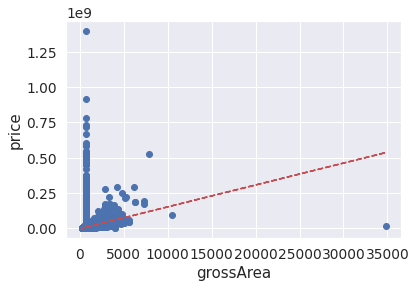

In [253]:
var = 'grossArea'
x = processed_df[var]
y = processed_df['price']

plt.scatter(x, y)
plt.xlabel(var)
plt.ylabel("price")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

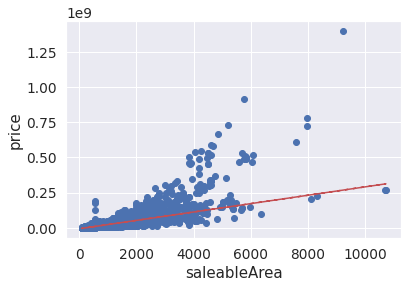

In [254]:
var = 'saleableArea'
x = processed_df[var]
y = processed_df['price']

plt.scatter(x, y)
plt.xlabel(var)
plt.ylabel("price")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

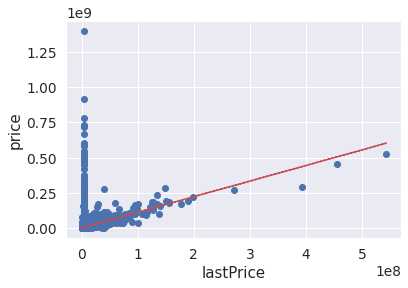

In [255]:
var = 'lastPrice'
x = processed_df[var]
y = processed_df['price']

plt.scatter(x, y)
plt.xlabel(var)
plt.ylabel("price")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

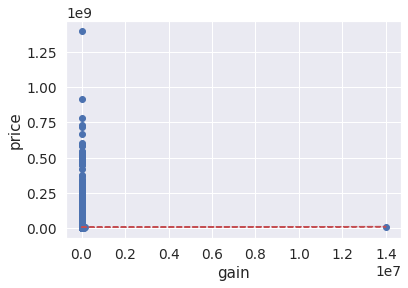

In [256]:
var = 'gain'
x = processed_df[var]
y = processed_df['price']

plt.scatter(x, y)
plt.xlabel(var)
plt.ylabel("price")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

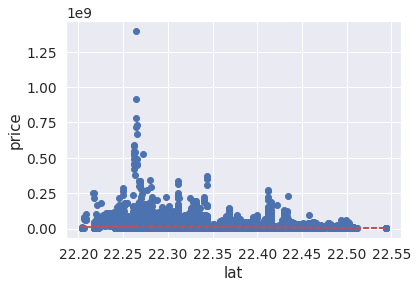

In [257]:
var = "lat"
temp_df = processed_df[processed_df[var]>0]
x = temp_df[var]
y = temp_df['price']

plt.xlabel(var)
plt.ylabel("price")
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

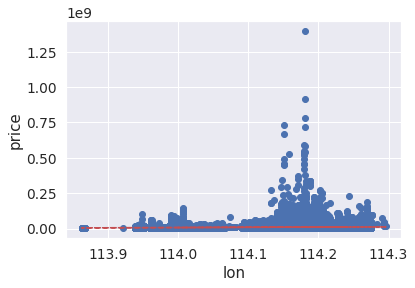

In [258]:
var = "lon"
temp_df = processed_df[processed_df[var]>0]
x = temp_df[var]
y = temp_df['price']

plt.xlabel(var)
plt.ylabel("price")
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

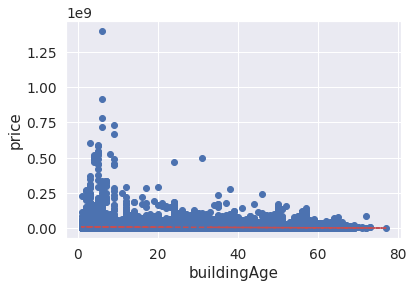

In [261]:
var = 'buildingAge'
x = processed_df[var]
y = processed_df['price']

plt.scatter(x, y)
plt.xlabel(var)
plt.ylabel("price")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

Length of data after removing outliers: 164830
Length of data after removing outliers: 162374
Length of data after removing outliers: 159991


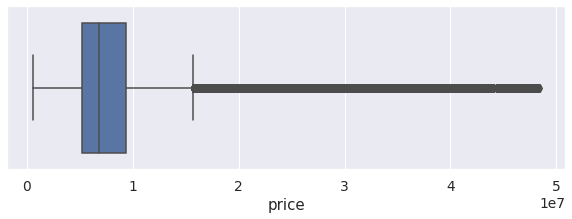

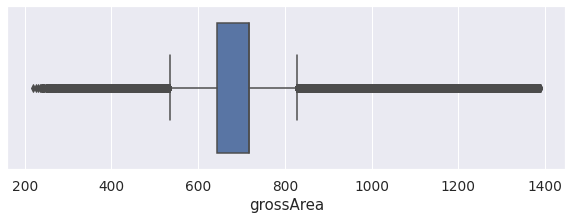

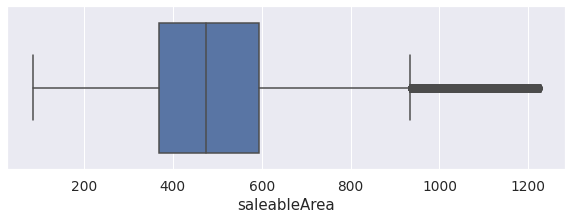

In [ ]:
# Remove outliers
processed_df = removeOutlier(processed_df, 'price')
processed_df = removeOutlier(processed_df, 'grossArea')
processed_df = removeOutlier(processed_df, 'saleableArea')

**Correlation Matrix and Heatmap**

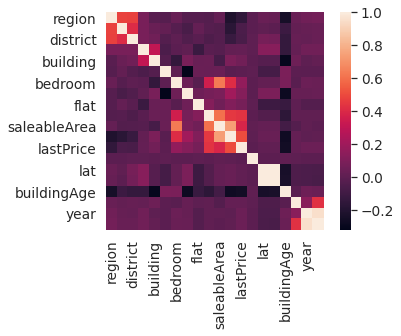

In [ ]:
df = processed_df.copy()
corrmat = df.corr()
sns.heatmap(corrmat, square=True);

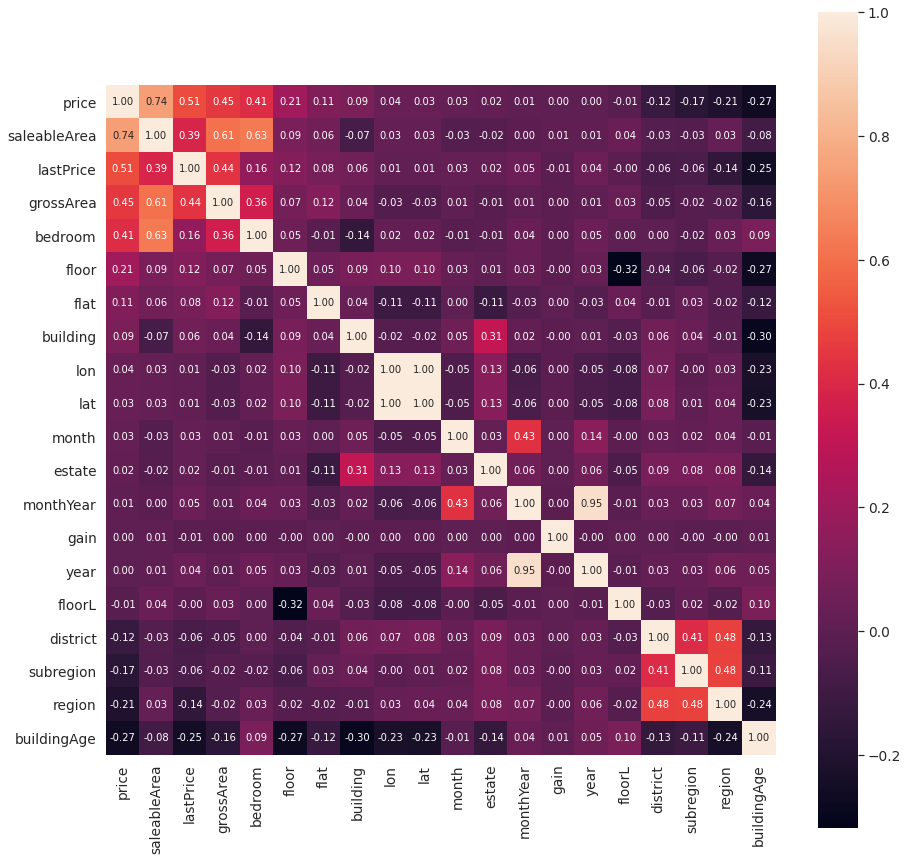

In [ ]:
k = 20
fig, ax = plt.subplots(figsize=(15,15)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

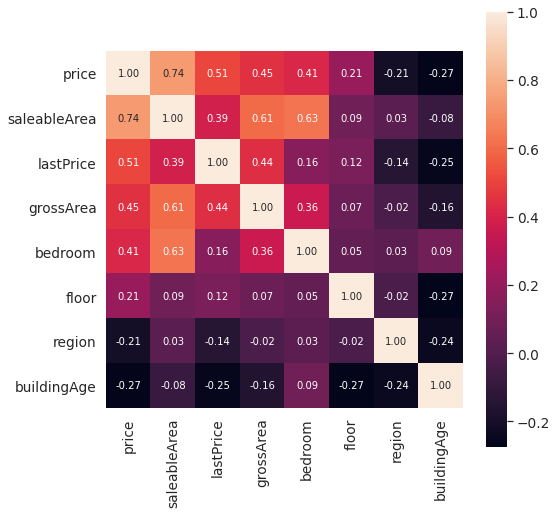

In [ ]:
top_7_df = outliers_removed_df.copy()

top_7_df = top_7_df.drop(['flat', 'building', 'lat', 'lon', 'month', 'estate', 'monthYear', 'gain', 'year', 'floorL', 'district', 'subregion', 'regDate'], axis=1) 

corrmat = top_7_df.corr()

k = 8
fig, ax = plt.subplots(figsize=(8,8)) 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(top_7_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()